In [110]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df=pd.read_csv("Telecom Customer Churn Dataset.csv")

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   phoneno    5000 non-null   int64  
 1   age        4994 non-null   float64
 2   gender     5000 non-null   object 
 3   zipcode    5000 non-null   int64  
 4   calls      5000 non-null   int64  
 5   sms        5000 non-null   int64  
 6   mms        5000 non-null   int64  
 7   charges    5000 non-null   int64  
 8   coverage   5000 non-null   int64  
 9   complaint  5000 non-null   int64  
 10  sim        5000 non-null   object 
 11  phone      5000 non-null   object 
 12  prepost    5000 non-null   object 
 13  churn      5000 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


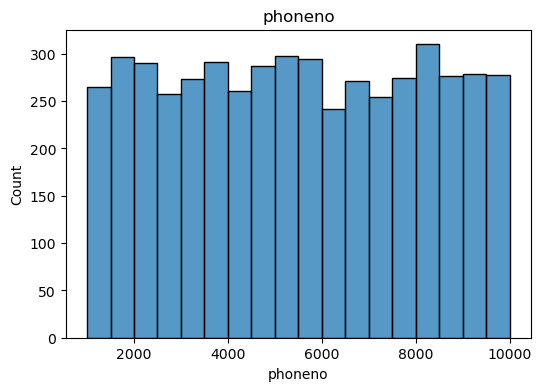

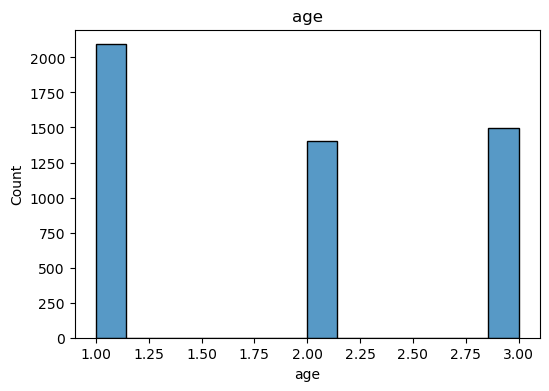

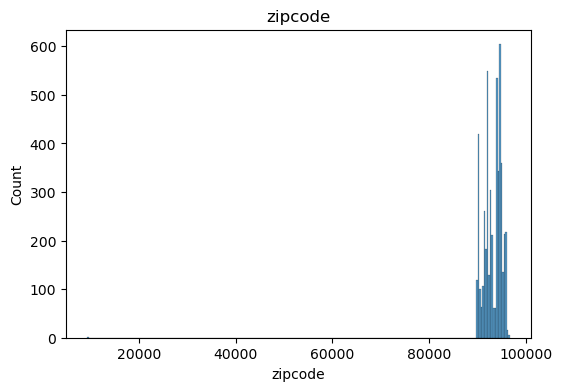

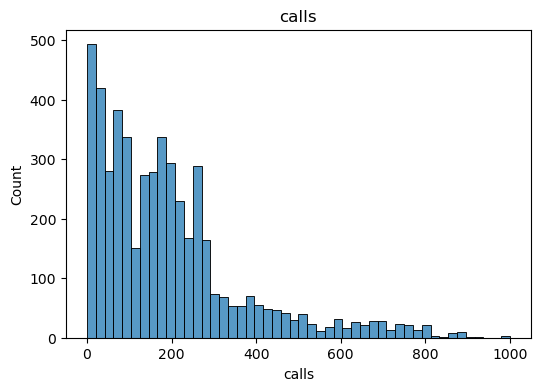

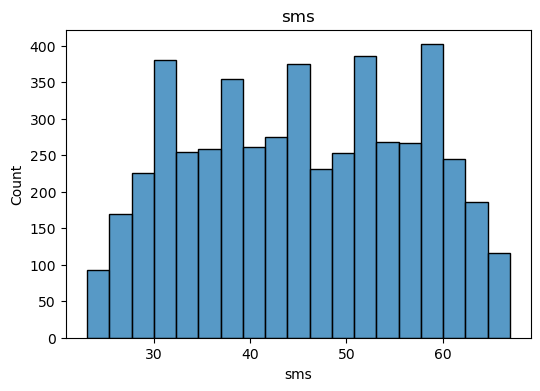

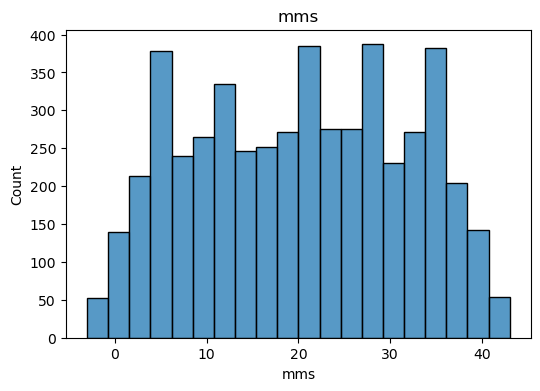

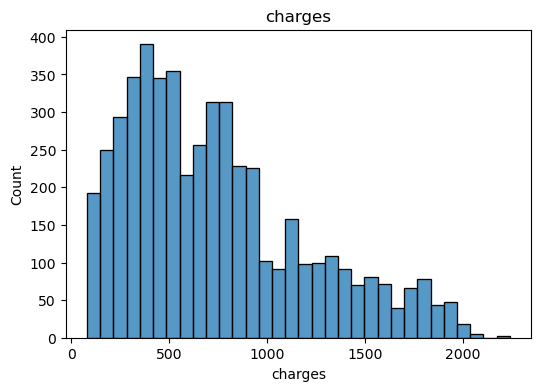

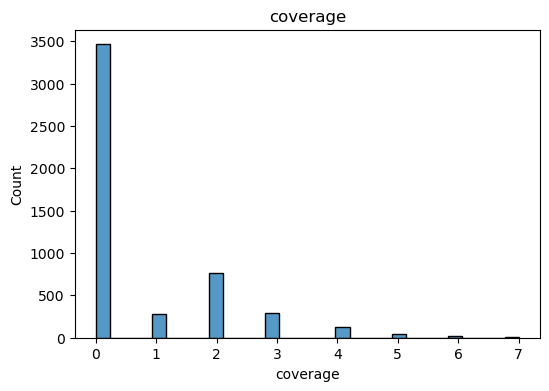

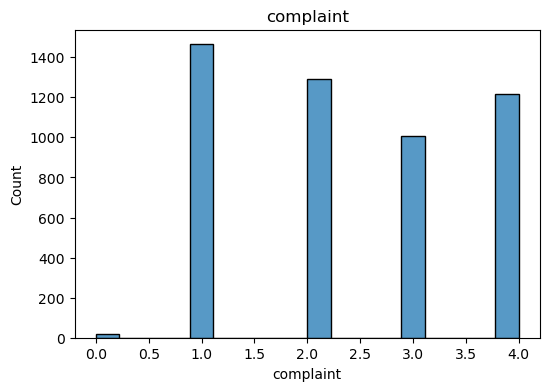

In [113]:
for column in df.columns:
    if df[column].dtype!=object:
        plt.figure(figsize=(6,4))
        sns.histplot(df[column])
        plt.title(column)
        plt.show()

phoneno are overall equally distributed. Age has most of 1 year. Most of the calls have are below 200 and are decreasing as the no. of calls increase, LEFT SKEWED. Charges is left skewed with maximum between 0 to 500. 

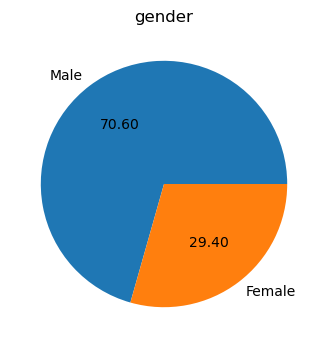

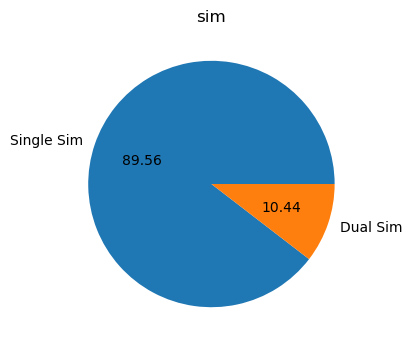

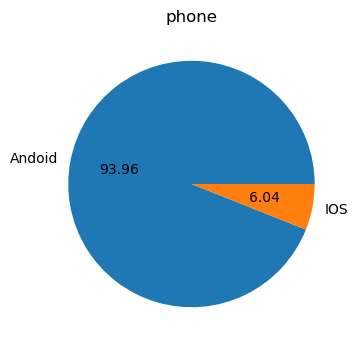

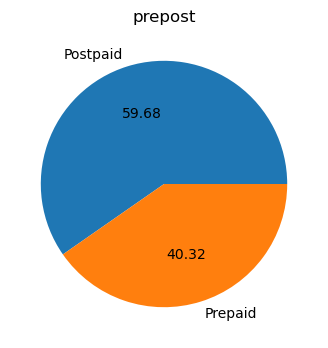

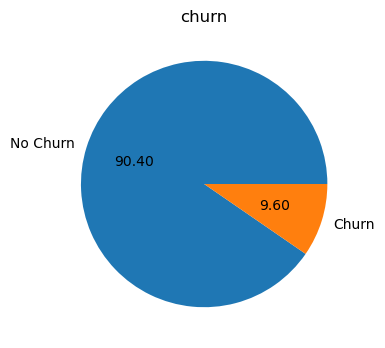

In [114]:
for column in df.columns:
    if df[column].dtype==object:
        plt.figure(figsize=(6,4))
        plt.pie(df[column].value_counts().values,labels=df[column].value_counts().index,autopct='%1.2f')
        plt.title(column)
        plt.show()

Most of the instances are of male, Single sim, Andoid, Postpaid and No Churn

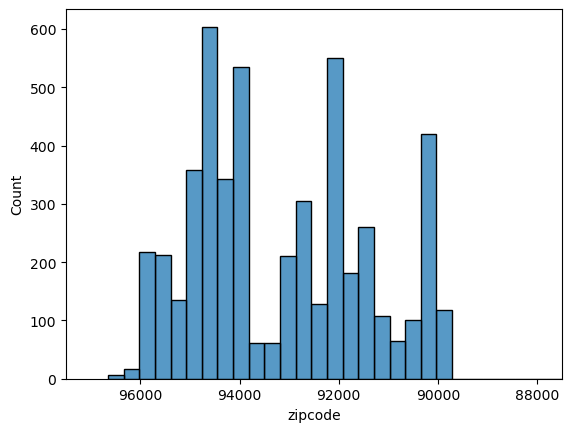

In [115]:
plt.xlim(97500,87500)
sns.histplot(df['zipcode'])
plt.show()

No trend in zipcode

### Outliers Handling

90025.0


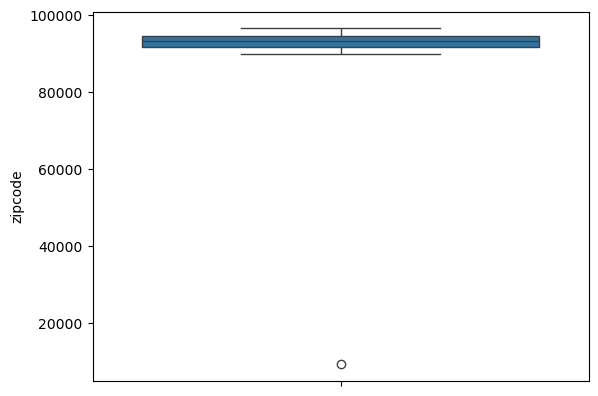

In [116]:
sns.boxplot(df['zipcode'])
print(df['zipcode'].quantile(0.02))

In [117]:
df['zipcode']=np.where(df['zipcode']<90025,90025,df['zipcode'])

340.0


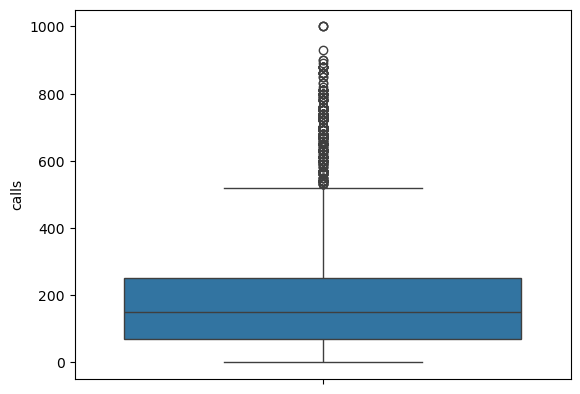

In [118]:
sns.boxplot(df['calls'])
print(df['calls'].quantile(0.85))

In [119]:
df['calls']=np.where(df['calls']>340,340,df['calls'])

1700.0


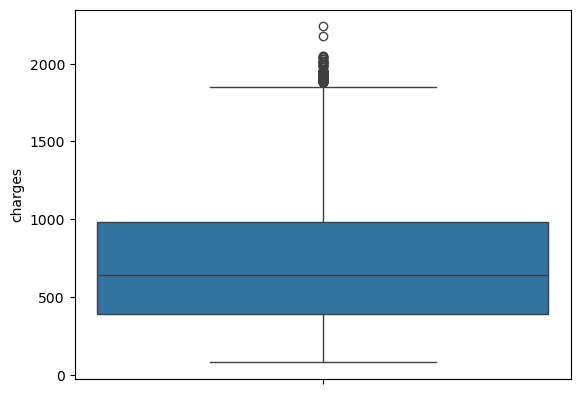

In [120]:
sns.boxplot(df['charges'])
plt.plot()
print(df['charges'].quantile(0.95))

In [121]:
df['charges']=np.where(df['charges']>1700,1700,df['charges'])

### Handling missing values

In [122]:
df.isna().sum()

phoneno      0
age          6
gender       0
zipcode      0
calls        0
sms          0
mms          0
charges      0
coverage     0
complaint    0
sim          0
phone        0
prepost      0
churn        0
dtype: int64

In [123]:
df['age']=df['age'].fillna(df['age'].mode()[0])

### Handling categorical variables

In [124]:
from sklearn import preprocessing
label_Encoder=preprocessing.LabelEncoder()

for column in df.columns:
    if df[column].dtype==object:
        df[column]=label_Encoder.fit_transform(df[column])

### Standardization

In [125]:
for column in df.columns:
    if column!='churn':
        df[column]=((df[column]-df[column].mean())/df[column].std())

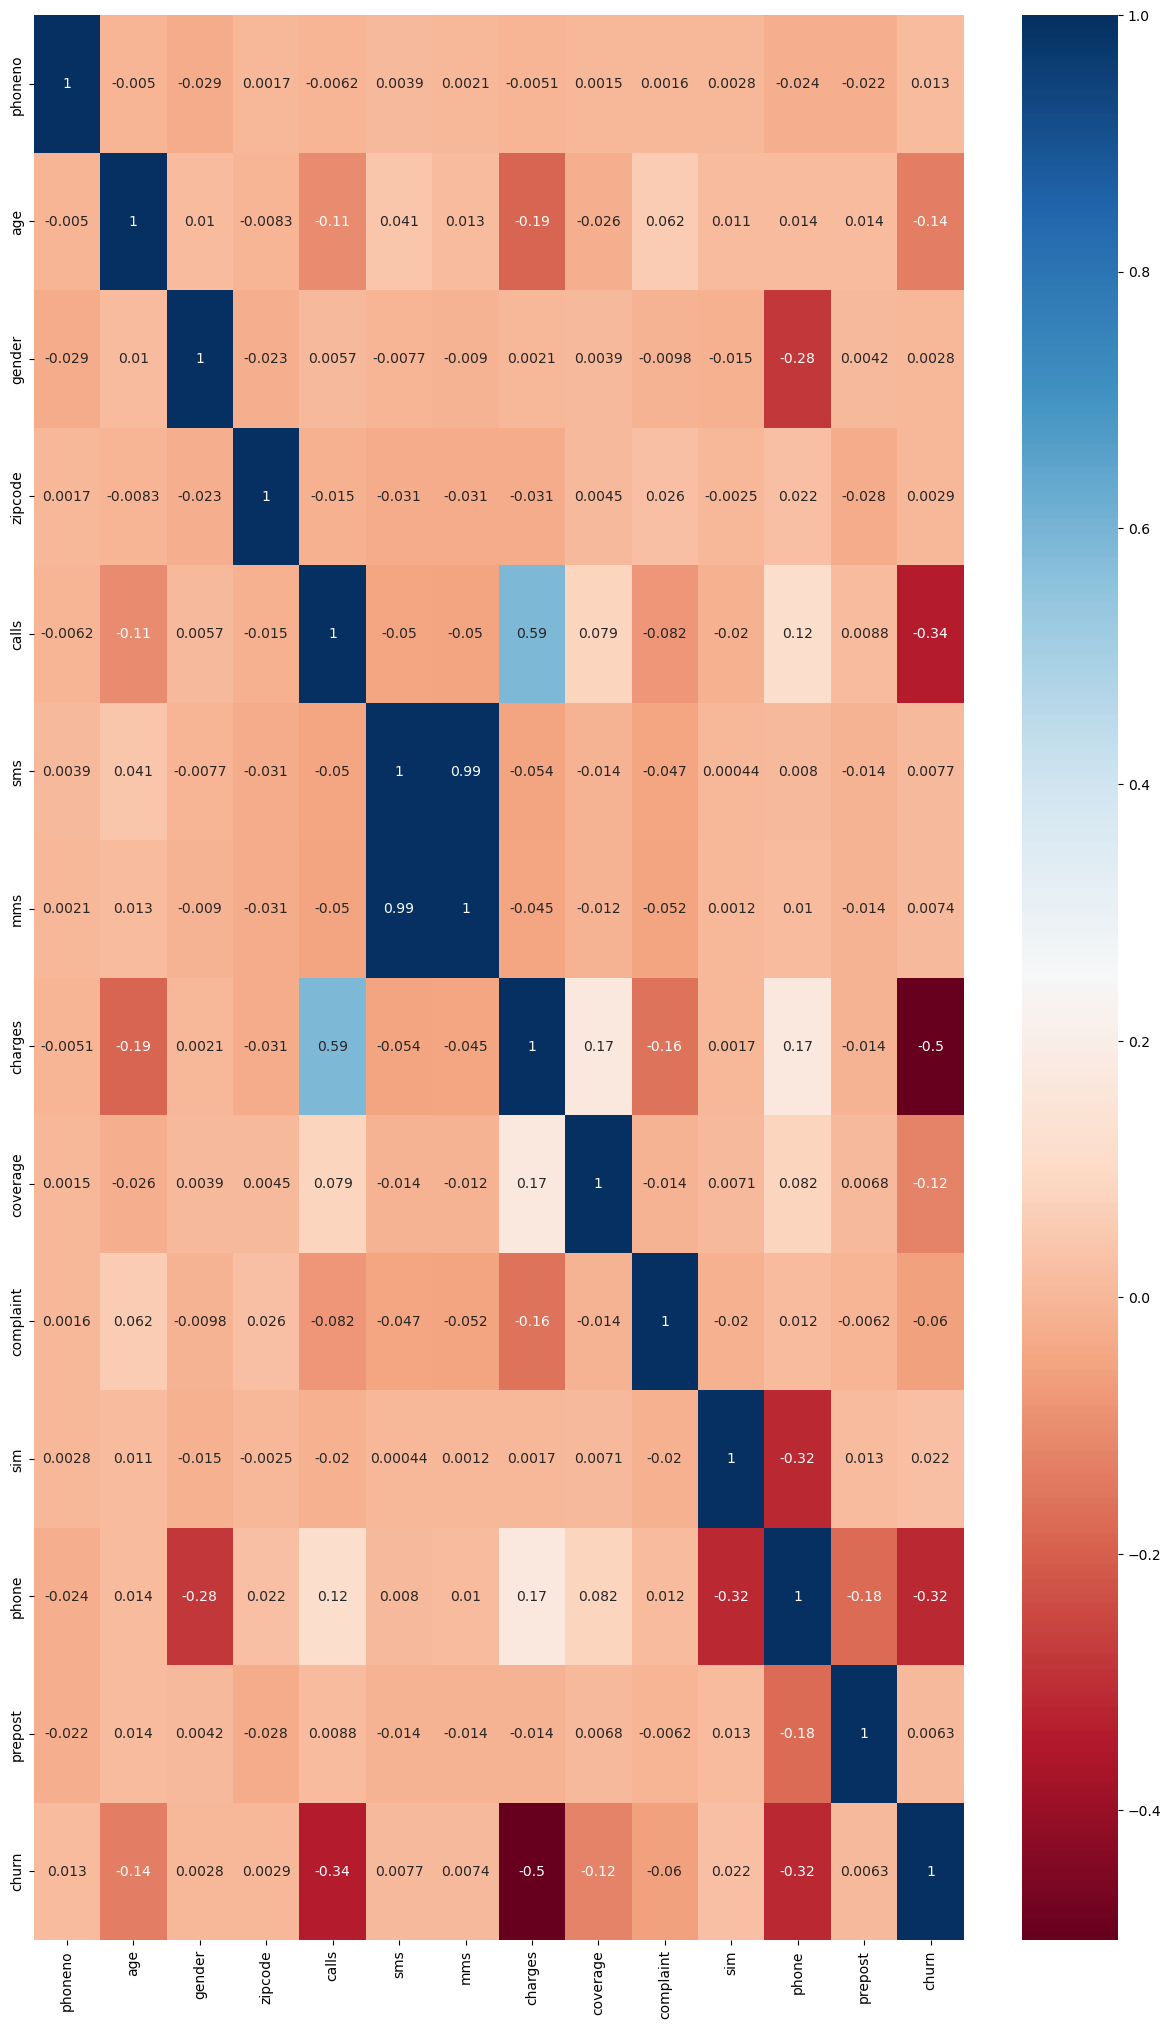

In [126]:
fig,ax=plt.subplots(figsize=(15,25))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="RdBu")
plt.show()

dropping phoneno and zipcode

In [127]:
df.drop(axis=1,columns=['phoneno','zipcode'],inplace=True)
df.churn.value_counts()

churn
1    4520
0     480
Name: count, dtype: int64

**The given data is imbalanced so we will be handling it later**

In [157]:
y=df['churn']
X=df.drop('churn',axis=1)

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [162]:
y_pred=logreg.predict(X_test)

In [166]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 78,  27],
       [  8, 887]])

In [168]:
print(metrics.accuracy_score(y_test,y_pred))

0.965


In [172]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       105
           1       0.97      0.99      0.98       895

    accuracy                           0.96      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.96      0.96      0.96      1000



In [173]:
import pickle
model_pkl_file="churn.pkl"s
with open(model_pkl_file,'wb') as file:
    pickle.dump(logreg,file)